In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import Tkinter as tk
import csv
import graphviz
import io
import pydotplus

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO
from PIL import Image
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split as TTS
from sklearn.tree import export_graphviz

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('googleplaystore.csv')

#Preprocess data
df2 = df.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'])
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
df2['Rating'] = imp.fit_transform(df2[['Rating']])

#Remove '+' in the 'Installs' collumn of data frame
df2['Installs'] = df2['Installs'].map(lambda x: x.rstrip('+'))
#Replace ',' in the 'Installs' collumn of data frame with empty string
df2['Installs'] = df2['Installs'].str.replace(',', '')
#Convert string to int for 'Installs' number
df2['Installs'] = df2['Installs'].astype("int")

#Create new 'Popularity' column
df2['Popularity'] = ''
df2.to_csv('googleplaystore_Update1.csv', index=False)

#Start to use the new update data frame for next tasks
df3 = pd.read_csv('googleplaystore_Update1.csv')
row = 0
for data in df3['Installs']:
	if data < 100000:
		df3.loc[row,'Popularity'] = 0#Low
	elif data < 10000000:
		df3.loc[row,'Popularity'] = 1#Medium
	else:
		df3.loc[row,'Popularity'] = 2#High
	row = row+1

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

In [3]:
df3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1.0
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.6M,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,0.0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19M,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,0.0
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29M,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,1.0
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33M,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,1.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.1M,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,0.0


In [4]:
#df3 = df3.groupby(['Content Rating', 'Popularity']).size()
#df3.plot.bar()

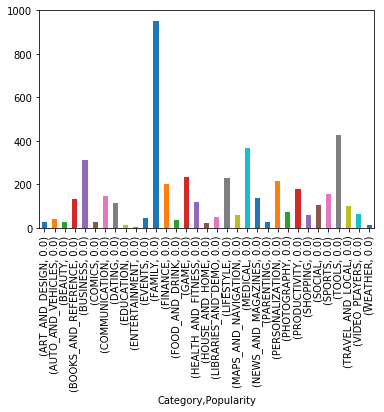

In [5]:
####################### category
df3Low = df3[df3['Popularity'] == 0]
df3Low = df3Low.groupby(['Category', 'Popularity']).size()
df3Low.plot.bar()

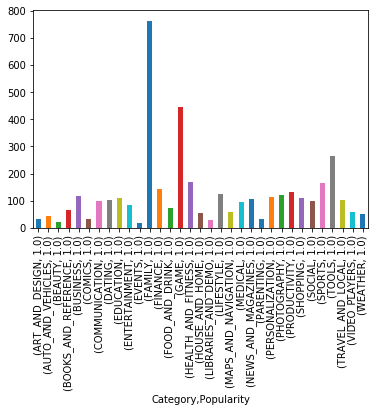

In [6]:
df3Med = df3[df3['Popularity'] == 1]
df3Med = df3Med.groupby(['Category', 'Popularity']).size()
df3Med.plot.bar()

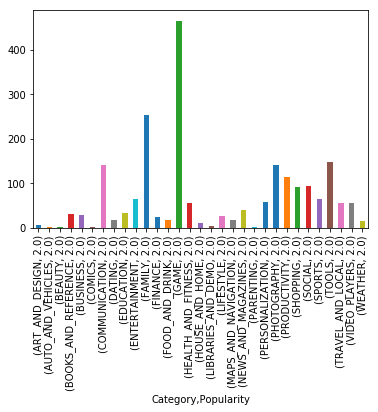

In [7]:
df3High = df3[df3['Popularity'] == 2]
df3High = df3High.groupby(['Category', 'Popularity']).size()
df3High.plot.bar()

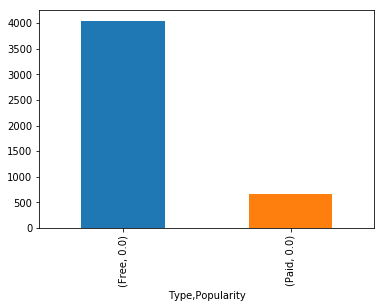

In [8]:
####################### Type
df3Low = df3[df3['Popularity'] == 0]
df3Low = df3Low.groupby(['Type', 'Popularity']).size()
df3Low.plot.bar()

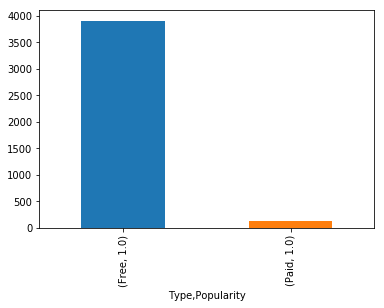

In [9]:
df3Med = df3[df3['Popularity'] == 1]
df3Med = df3Med.groupby(['Type', 'Popularity']).size()
df3Med.plot.bar()

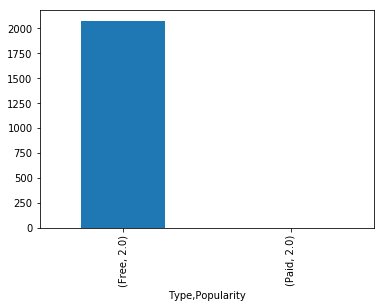

In [10]:
df3High = df3[df3['Popularity'] == 2]
df3High = df3High.groupby(['Type', 'Popularity']).size()
df3High.plot.bar()

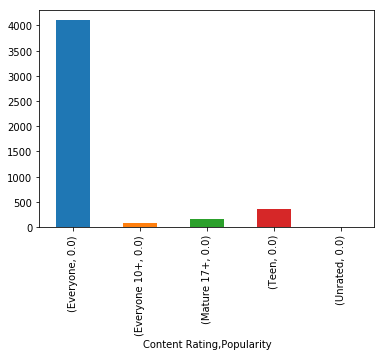

In [11]:
####################### Content Rating
df3Low = df3[df3['Popularity'] == 0]
df3Low = df3Low.groupby(['Content Rating', 'Popularity']).size()
df3Low.plot.bar()

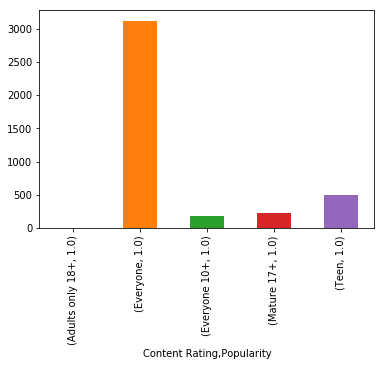

In [12]:
df3Med = df3[df3['Popularity'] == 1]
df3Med = df3Med.groupby(['Content Rating', 'Popularity']).size()
df3Med.plot.bar()

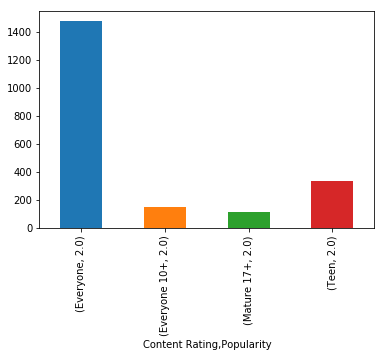

In [13]:
df3High = df3[df3['Popularity'] == 2]
df3High = df3High.groupby(['Content Rating', 'Popularity']).size()
df3High.plot.bar()

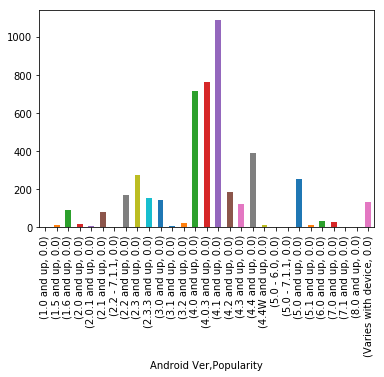

In [14]:
####################### Android Ver
df3Low = df3[df3['Popularity'] == 0]
df3Low = df3Low.groupby(['Android Ver', 'Popularity']).size()
df3Low.plot.bar()

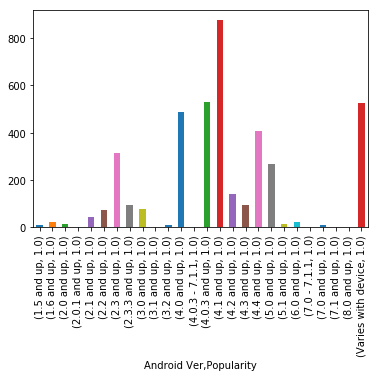

In [15]:
df3Med = df3[df3['Popularity'] == 1]
df3Med = df3Med.groupby(['Android Ver', 'Popularity']).size()
df3Med.plot.bar()

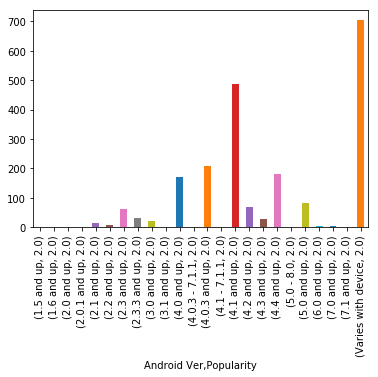

In [16]:
df3High = df3[df3['Popularity'] == 2]
df3High = df3High.groupby(['Android Ver', 'Popularity']).size()
df3High.plot.bar()